In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.io as sio
from sklearn import svm
import matplotlib.pyplot as plt

In [3]:
# kernel function 高斯核函数
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-np.power((x1 - x2), 2).sum() / (2*np.power(sigma, 2)))

In [4]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

gaussian_kernel(x1, x2, sigma)

0.32465246735834974

# load data

In [5]:
mat = sio.loadmat('./data/ex6data2.mat')
print(mat.keys())
data = pd.DataFrame(mat['X'], columns = ['X1', 'X2'])
data['y'] = mat['y']
data.head()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


In [7]:
data.shape

(863, 3)

# Visualize Data

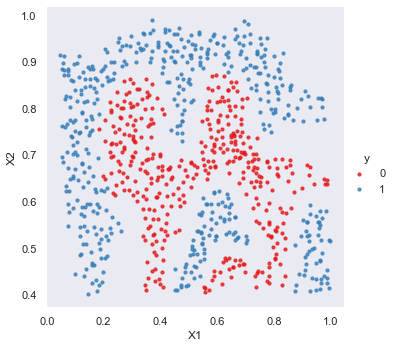

In [15]:
sns.set(context = 'notebook', style = 'dark', palette = 'Set1')
sns.lmplot(x = 'X1', y = 'X2', hue = 'y', data = data, height = 5, fit_reg = False, scatter_kws = {'s': 10})
plt.show()

# Try build-in Gaussian Kernel of sklearn

In [17]:
svc = svm.SVC(C = 100, kernel = 'rbf', gamma = 10, probability = True)
svc

SVC(C=100, gamma=10, probability=True)

In [21]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.9698725376593279

the `predict_proba` will give you ndarray (data size, class)

so if you just want to plot the decision contour of this binary example, choose one class and plot it

In [33]:
predict_prob = svc.predict_proba(data[['X1', 'X2']])[:,0]

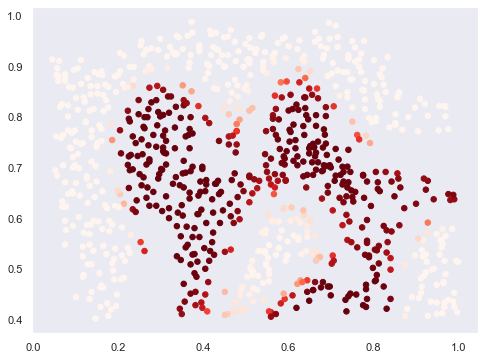

In [35]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.scatter(data['X1'], data['X2'], s = 30 , c = predict_prob, cmap = 'Reds')
plt.show()

In [25]:
predict_prob2 = svc.predict_proba(data[['X1', 'X2']])[:,1]